In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

color = px.colors.sequential.Rainbow[::-1]
marker_size = 2

def plot_3D (exp_name , depth_axis):
    my_sample_x = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    my_sample_y = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    my_sample_z = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")
    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth,max_depth],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()



In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

color = px.colors.sequential.Rainbow[::-1]
marker_size = 2

def plot_3D (exp_name , depth_axis):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    # print("print upper_angle = "+upper_angle)
    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)

    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return
   

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth-200,max_depth+200],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()



# 1 ) Corner mapping experement
![title](img/corner.jpg)


In [ ]:
plot_3D("3D_corner",'y')
plot_3D("3D_corner",'z')

In [ ]:
plot_3D("3D_corner(1)",'y')
plot_3D("3D_corner(1)",'z')

# 2 ) Cylinder mapping experement
![title](img/cylinder.jpg)


In [ ]:
plot_3D("3D_cylinder",'y')
plot_3D("3D_cylinder",'z')

In [ ]:
plot_3D("3D_cylinder(1)",'y')
plot_3D("3D_cylinder(1)",'z')

# 3 ) Body mapping experement
![title](img/ezzat_body.jpg)


In [ ]:
plot_3D("3D_ezzat_body",'y')
plot_3D("3D_ezzat_body",'z')

# 4 ) Face mapping experement
![title](img/ezzat_face.jpg)


In [ ]:
plot_3D("3D_ezzat_face",'y')
plot_3D("3D_ezzat_face",'z')

In [ ]:
plot_3D("waleed_face",'y')
plot_3D("waleed_face",'z')

In [ ]:
plot_3D("wall",'y')
plot_3D("wall",'z')

In [ ]:
#50
plot_3D("wall1",'y')
plot_3D("wall1",'z')

In [ ]:
#50
plot_3D("wall2",'y')
plot_3D("wall2",'z')

In [ ]:
#50
plot_3D("wall4",'y')
# plot_3D("wall4",'z')

In [ ]:
#50
plot_3D("wall4d",'y')
plot_3D("wall4d",'z')

In [ ]:
#50
plot_3D("wall7",'y')
plot_3D("wall7",'z')

In [ ]:
plot_3D("hello3",'y')
plot_3D("hello3",'z')

In [54]:
import numpy as np
from plotly import offline
from plotly import graph_objs as go
import torch
from PIL import Image
import plotly.express as px
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
color = px.colors.sequential.Rainbow[::-1]
marker_size = 3

def points_to_image(exp_name,threshold):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    
    min_depth = np.amin(my_sample_y)
    max_depth = (min_depth + threshold)
    indx = my_sample_y <= (min_depth + threshold)

    my_sample_x = my_sample_x[indx]
    my_sample_y = my_sample_y[indx]
    my_sample_z = my_sample_z[indx]
    
   
    
    
    
    
    
    my_sample_y = 1-  my_sample_y / np.max(my_sample_y)
    

    x_min = np.min(my_sample_x)
    x_max = np.max(my_sample_x)
    y_min = np.min(my_sample_y)
    y_max = np.max(my_sample_y)
    z_min = np.min(my_sample_z)
    z_max = np.max(my_sample_z)
    width = 1+(x_max - x_min).astype(int)
    hight = 1+(z_max - z_min).astype(int)

    # my_sample_y = my_sample_y + (1-y_max)
    print("img :: ",width,hight)
    img = np.zeros((width,hight))
    
    for i in range(len(my_sample_x)):
        x = (my_sample_x[i] - x_min).astype(int)
        z = (my_sample_z[i] - z_min).astype(int)
#         print("x,z :: ",x,z)
        img[x,z] = my_sample_y[i]
        
#     img = Image.fromarray(img)
    print(len(my_sample_x))
    
    kernel = np.ones((5,5), np.uint8)
 
    # The first parameter is the original image,
    # kernel is the matrix with which image is
    # convolved and third parameter is the number
    # of iterations, which will determine how much
    # you want to erode/dilate a given image.
    img_erosion = cv2.erode(img, kernel, iterations=1)
    img_dilation = cv2.dilate(img, kernel, iterations=5)

    cv2.imshow('Input', img)
    cv2.imshow('Erosion', img_erosion)
    cv2.imshow('Dilation', img_dilation)

    cv2.waitKey(0)
#     img.show()
    
def plot_3D (exp_name , depth_axis):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return
   

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth-200,max_depth+200],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()
    
    
def plot_3D_threshold (exp_name ,folder_indx , depth_axis ,threshold):
    folder = ["3D_Experements", "flat_Experements"]
    dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    df = pd.DataFrame()
    
    indx = []
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        min_depth = np.amin(my_sample_x)
        max_depth = threshold#(min_depth + threshold)
        indx = my_sample_x<= threshold#(min_depth + threshold)
        df['Depth'] = my_sample_x[indx]

    elif depth_axis == 'y':
        min_depth = np.amin(my_sample_y)
        max_depth = threshold#(min_depth + threshold)
        indx = my_sample_y <= threshold#(min_depth + threshold)
#         print(my_sample_y , (min_depth + threshold))
#         print(type(my_sample_y),type(my_sample_y[indx]))
        df['Depth'] = my_sample_y[indx]

    elif depth_axis == 'z':
        min_depth = np.amin(my_sample_z)
        max_depth = threshold#(min_depth + threshold)
        indx = my_sample_z<= threshold#(min_depth + threshold)
        df['Depth'] = my_sample_z[indx]
        

    else:
        print("invalid depth axis")
        return
    df['X (mm)'] = my_sample_x[indx]
    df['Y (mm)'] = my_sample_y[indx]
    df['Z (mm)'] = my_sample_z[indx]
    df.head()
   

    # fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth,max_depth], range_y=[300,700],color_continuous_scale=color , opacity=1)
    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth,max_depth],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()


def plot_2D (exp_name):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)

    minx = np.min(my_sample_x)
    miny = np.min(my_sample_y)
    minz = np.min(my_sample_z)

    maxx = np.max(my_sample_x)
    maxy = np.max(my_sample_y)
    maxz = np.max(my_sample_z)

    # img =np.zeros(int(maxx-minx),int(maxz-minz))
    # img =np.zeros((int(maxx-minx),int(maxz-minz)), dtype=np.float64)
    # img =np.zeros(len(my_sample_x),len(my_sample_z)), dtype=np.float64)

    # for i in range(len(my_sample_x) - 1):
    #     img[int(my_sample_x[i] - minx -1)][int(my_sample_z[i] - minz -1)] = (my_sample_y[i] / maxy)*255
    
    trace = go.Surface(x = my_sample_x, y = my_sample_y, z =my_sample_z )
    data = [trace]
    layout = go.Layout(title = '3D Surface plot')
    fig = go.Figure(data = data)
    plot(fig)
    offline.init_notebook_mode(connected=False)

    df3 = {'x':[1, 2, 3, 4, 5],'y':[10, 20, 30, 40, 50],'z': [[5, 4, 3, 2, 1]]*5}
    offline.iplot(dict(data=[go.Surface(x=df3['x'], y=df3['y'], z=df3['z'])]))

def plot_var(threshold):
    exp_p = ["gedo_14_7",
             "waleed_14_7",
             "ta7a_14_7",
             "nassar_14_7"]

    exp_n = ["metal_dish",
            "painting"]

    var_all = []
    count = 0
    color = []

    for i in range(len(exp_p)):
        for j in range(1000):
            exp_name = exp_p[i] + "_" + str(j)
            dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
            upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
            lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")
            my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)

            min_depth = np.amin(my_sample_y)
            max_depth = (min_depth + threshold)
            indx = my_sample_y <= (min_depth + threshold)
            my_sample_y = my_sample_y[indx]
            var_all.append(np.var(my_sample_y))
            count+=1
            color.append(0)
            # print(count)

    
    for i in range(len(exp_n)):
        for j in range(1000):
            exp_name = exp_n[i] + "_" + str(j)
            dist = np.loadtxt("flat_Experements/"+exp_name+"_x.txt")
            upper_angle = np.loadtxt("flat_Experements/"+exp_name+"_y.txt")
            lower_angle = np.loadtxt("flat_Experements/"+exp_name+"_z.txt")
            my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
            # var_all.append(np.var(my_sample_y))

            min_depth = np.amin(my_sample_y)
            max_depth = (min_depth + threshold)
            indx = my_sample_y <= (min_depth + threshold)
            my_sample_y = my_sample_y[indx]
            var_all.append(np.var(my_sample_y))
            color.append(1)
            count+=1
            # print(count)

    x = [num for num in range(0, len(var_all), 1)]
    # a = np.array([x,var_all])

    categories = np.array(color)

    colormap = np.array(['g', 'r'])

    plt.scatter(np.array(x), np.array(var_all), s=100, c=colormap[categories])

    # plt.savefig('ScatterClassPlot.png')
    # plt.show()
     
    
    # plt.plot(x, var_all,'o',color = color)
    plt.xlabel('X')
    plt.ylabel('var')
    plt.grid(True)

    plt.plot()
from skimage.filters import threshold_minimum

min_dist = 200
max_dist=800
bin_size = 4
def plot_hist(exp_name,folder_indx):
    np.seterr(divide='ignore', invalid='ignore')
    folder = ["3D_Experements", "flat_Experements"]
    dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")

    my_sample_y = np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    # plt.hist(my_sample_y , bins = [i for i in range(200,800,10)]) 
    # plt.title("histogram") 
    # thresh_min = threshold_minimum(my_sample_y)
    # print(thresh_min)
    # plt.axvline(thresh_min, color='r')
    # plt.show()  

    #######################################
    


    # Set total number of bins in the histogram
    bins_num = [i for i in range(min_dist,max_dist,bin_size)]#256

    
    # Get the image histogram
    n = plt.hist(my_sample_y , bins = bins_num) 
    hist = n[0]
    bin_edges = n[1]
    
    total_value = np.sum(hist)
    hist_prob = hist / total_value
    hist_cumsum = np.cumsum(hist_prob)
    new_hist = hist_cumsum * mapping_value
#     print ("hist_cumsum:: ",hist_cumsum)
    new_hist = np.floor(new_hist).astype(int)
#     print ("new_hist:: ",new_hist)
    new_my_sample_y = np.zeros(len(my_sample_y))
    for idx in range (len(my_sample_y)):
        new_my_sample_y[idx] = my_sample_y[idx]
    
    # Get normalized histogram if it is required
#     if is_normalized:
#     hist = np.divide(hist.ravel(), hist.max())
#     hist = preprocessing.normalize([hist])
    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    
    # print ("bin_edges[:-1]" , bin_edges[:-1])
    # print ("bin_edges[1:]", bin_edges[1:])
    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    
    weight2 = np.cumsum(hist[::-1])[::-1]
    
    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    mean1 = np.nan_to_num(mean1)
    mean2 = np.nan_to_num(mean2)
    

    
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    print("Otsu's algorithm implementation thresholding result: ", threshold)

    
    plt.title("histogram") 
    plt.axvline(threshold, color='r')
    plt.show()
     
    return threshold,hist,bin_edges
    


In [55]:
def Histogram_Equalization (hist, mapping_value):
    print (hist.shape)
    print ("nassar:",hist)
    total_value = np.sum(hist)
    hist_prob = hist / total_value
    hist_cumsum = np.cumsum(hist_prob)
    new_hist = hist_cumsum * mapping_value
    print ("hist_cumsum:: ",hist_cumsum)
    new_hist = np.floor(new_hist).astype(int)
    print ("new_hist:: ",new_hist)
    new_array = np.zeros(mapping_value)
    for idx in range (len(hist)):
        new_array[new_hist[idx]+200] = hist[idx]
#         print (new_array[new_hist[idx]])
#     plt.hist(hist, bins =[i for i in range(200,800,4)] )
    print(new_array)
    plt.hist(new_array, bins =[i for i in range(200,800,4)] )
    plt.show()


Otsu's algorithm implementation thresholding result:  478.0


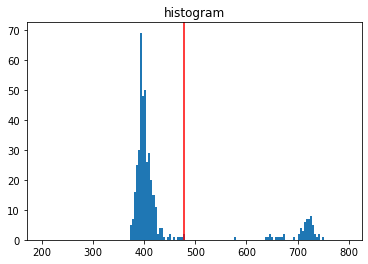

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  5.  7. 16. 25. 30. 69. 48. 50. 26. 29. 20.
 15. 11.  2.  4.  4.  1.  0.  1.  2.  0.  1.  0.  1.  1.  1.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  2.  1.  0.  1.  1.  1.  1.  2.  0.  0.  0.  0.  1.  0.  2.
  4.  3.  6.  7.  7.  8.  5.  2.  1.  2.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
(149,)
nassar: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  5.  7. 16. 25. 30. 69. 48. 50. 26. 29. 20.
 15. 11.  2.  4.  4.  1.  0.  1.  2.  0.  1.  0.  1.  1.  1.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  

IndexError: index 200 is out of bounds for axis 0 with size 149

In [56]:
# plot_3D("waleed2_12_7",'y')\
# plot_3D_threshold("ta7a_14_7_20",0,'y',100000)
# plot_3D_threshold("metal_dish_20",1,'y',1000000)
# points_to_image("ta7a_14_7_20",90)
# plot_hist("nassar_14_7_20",0)
# plot_hist("painting_20",1)

# plot_3D_threshold("ta7a_14_7_200",0,'y',plot_hist("ta7a_14_7_200",0)[0])
# plot_3D_threshold("painting_200",1,'y',plot_hist("painting_200",1)[0])
t , h, e = plot_hist("ahmed_image_40cm_100",1)
print (h)
Histogram_Equalization (h, len(h))
# print ("old_h  ::  ",h)
# h = h[h != 0]

# print ("new_h  ::  ",h)
# print(e)
# print(t)
# # print(len(h[1][indx[:len(indx)]]))
# his = [ h[i] if e[i] < t else 0 for i in range(h.size)]
# print(his)
# print(len(h[2]))
# h = [ h[i] if i <= t else 0 for i in range(len(h))]


In [ ]:
feature_hist_ = []
target_list_ = []
feature_hist_.append(his)
target_list_.append(1)

13.5
-13.5
13.5
-13.5


Otsu's algorithm implementation thresholding result:  58.0


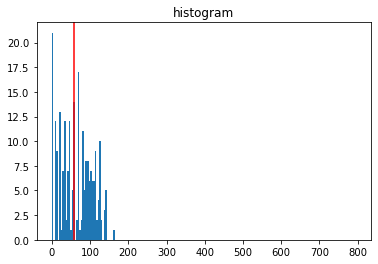

(58.0,
 array([21.,  0., 12.,  9.,  0., 13.,  1.,  7., 12.,  2.,  7., 12.,  1.,
         5., 14.,  0.,  2., 17.,  1.,  2., 11.,  5.,  8.,  8.,  6.,  7.,
         6.,  6.,  9.,  2.,  4., 10.,  2.,  0.,  3.,  5.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [65]:
plot_3D_threshold("test_waleed2_17_7",0,'y',520)
plot_hist("test_waleed2_17_7",0)

In [ ]:
target_list = np.loadtxt("features/temp_target_list.txt")
data_list = np.loadtxt("features/temp_data.txt")

In [121]:
# This function is used to create separated dataset files 
# for each experement 
def create_dataset():
#     exp_p = ["waleed_60CM", 
#             "nassar_50cm",
#             "gedo_50cm"]
#     exp_p = ["gedo_14_7",
#                 "waleed_14_7",
#                 "ta7a_14_7",
#                 "nassar_14_7"]

    exp_n = ["metal_dish",
            "painting", 
            "ahmed_image_40cm", 
            "ahmed_image_40cm_with_chair_behind", 
            "ahmed_image_50cm", 
            "ahmed_image_50cm_with_chair_behind", 
            "ahmed_image_60cm", 
            "ahmed_image_60cm_with_chair_behind", 
#             "Ball_40cm", 
#             "Ball_50cm", 
#             "Ball_60cm", 
#             "basket_40cm", 
#             "basket_50cm", 
#             "basket_60cm", 
#             "vas"
            ]
    count = 0

    for i in range(len(exp_n)):
        feature_hist = []
        target_list = []
        for j in range(1000):
#             exp_name = exp_n[i] + "_" + str(j)
#             t , h ,e = plot_hist(exp_name,1)
            # h = h/np.sum(h)
#             f = [ h[n] if e[n] < t else 0 for n in range(h.size)]
#             feature_hist.append(f)
            target_list.append(-1)
            count += 1
            print("count :: ",count)
#         feature_hist = np.array(feature_hist)
        target_list = np.array(target_list)
#         file_data = open("features/"+exp_n[i]+"_features.txt", "a")
#         np.savetxt(file_data, feature_hist)
#         file_data.close()

        file_target_list = open("features/"+exp_n[i]+"_target_list.txt", "a")
        np.savetxt(file_target_list, target_list)
        file_target_list.close()
        
#     for i in range(len(exp_p)):
#         feature_hist = []
#         target_list = []
#         for j in range(1000):
#             exp_name = exp_p[i] + "_" + str(j)
#             t , h ,e = plot_hist(exp_name,0)
#             # h = h/np.sum(h)
#             f = [ h[n] if e[n] < t else 0 for n in range(h.size)]
#             feature_hist.append(f)
#             target_list.append(1)
#             count += 1
#             print("count :: ",count)
#         feature_hist = np.array(feature_hist)
#         target_list = np.array(target_list)
#         file_data = open("features/"+exp_p[i]+"_features.txt", "a")
#         np.savetxt(file_data, feature_hist)
#         file_data.close()

#         file_target_list = open("features/"+exp_p[i]+"_target_list.txt", "a")
#         np.savetxt(file_target_list, target_list)
#         file_target_list.close()
    return "done"




In [122]:
print(create_dataset())

count ::  1
count ::  2
count ::  3
count ::  4
count ::  5
count ::  6
count ::  7
count ::  8
count ::  9
count ::  10
count ::  11
count ::  12
count ::  13
count ::  14
count ::  15
count ::  16
count ::  17
count ::  18
count ::  19
count ::  20
count ::  21
count ::  22
count ::  23
count ::  24
count ::  25
count ::  26
count ::  27
count ::  28
count ::  29
count ::  30
count ::  31
count ::  32
count ::  33
count ::  34
count ::  35
count ::  36
count ::  37
count ::  38
count ::  39
count ::  40
count ::  41
count ::  42
count ::  43
count ::  44
count ::  45
count ::  46
count ::  47
count ::  48
count ::  49
count ::  50
count ::  51
count ::  52
count ::  53
count ::  54
count ::  55
count ::  56
count ::  57
count ::  58
count ::  59
count ::  60
count ::  61
count ::  62
count ::  63
count ::  64
count ::  65
count ::  66
count ::  67
count ::  68
count ::  69
count ::  70
count ::  71
count ::  72
count ::  73
count ::  74
count ::  75
count ::  76
count ::  77
count ::

count ::  701
count ::  702
count ::  703
count ::  704
count ::  705
count ::  706
count ::  707
count ::  708
count ::  709
count ::  710
count ::  711
count ::  712
count ::  713
count ::  714
count ::  715
count ::  716
count ::  717
count ::  718
count ::  719
count ::  720
count ::  721
count ::  722
count ::  723
count ::  724
count ::  725
count ::  726
count ::  727
count ::  728
count ::  729
count ::  730
count ::  731
count ::  732
count ::  733
count ::  734
count ::  735
count ::  736
count ::  737
count ::  738
count ::  739
count ::  740
count ::  741
count ::  742
count ::  743
count ::  744
count ::  745
count ::  746
count ::  747
count ::  748
count ::  749
count ::  750
count ::  751
count ::  752
count ::  753
count ::  754
count ::  755
count ::  756
count ::  757
count ::  758
count ::  759
count ::  760
count ::  761
count ::  762
count ::  763
count ::  764
count ::  765
count ::  766
count ::  767
count ::  768
count ::  769
count ::  770
count ::  771
count 

count ::  1374
count ::  1375
count ::  1376
count ::  1377
count ::  1378
count ::  1379
count ::  1380
count ::  1381
count ::  1382
count ::  1383
count ::  1384
count ::  1385
count ::  1386
count ::  1387
count ::  1388
count ::  1389
count ::  1390
count ::  1391
count ::  1392
count ::  1393
count ::  1394
count ::  1395
count ::  1396
count ::  1397
count ::  1398
count ::  1399
count ::  1400
count ::  1401
count ::  1402
count ::  1403
count ::  1404
count ::  1405
count ::  1406
count ::  1407
count ::  1408
count ::  1409
count ::  1410
count ::  1411
count ::  1412
count ::  1413
count ::  1414
count ::  1415
count ::  1416
count ::  1417
count ::  1418
count ::  1419
count ::  1420
count ::  1421
count ::  1422
count ::  1423
count ::  1424
count ::  1425
count ::  1426
count ::  1427
count ::  1428
count ::  1429
count ::  1430
count ::  1431
count ::  1432
count ::  1433
count ::  1434
count ::  1435
count ::  1436
count ::  1437
count ::  1438
count ::  1439
count ::  

count ::  2055
count ::  2056
count ::  2057
count ::  2058
count ::  2059
count ::  2060
count ::  2061
count ::  2062
count ::  2063
count ::  2064
count ::  2065
count ::  2066
count ::  2067
count ::  2068
count ::  2069
count ::  2070
count ::  2071
count ::  2072
count ::  2073
count ::  2074
count ::  2075
count ::  2076
count ::  2077
count ::  2078
count ::  2079
count ::  2080
count ::  2081
count ::  2082
count ::  2083
count ::  2084
count ::  2085
count ::  2086
count ::  2087
count ::  2088
count ::  2089
count ::  2090
count ::  2091
count ::  2092
count ::  2093
count ::  2094
count ::  2095
count ::  2096
count ::  2097
count ::  2098
count ::  2099
count ::  2100
count ::  2101
count ::  2102
count ::  2103
count ::  2104
count ::  2105
count ::  2106
count ::  2107
count ::  2108
count ::  2109
count ::  2110
count ::  2111
count ::  2112
count ::  2113
count ::  2114
count ::  2115
count ::  2116
count ::  2117
count ::  2118
count ::  2119
count ::  2120
count ::  

count ::  2649
count ::  2650
count ::  2651
count ::  2652
count ::  2653
count ::  2654
count ::  2655
count ::  2656
count ::  2657
count ::  2658
count ::  2659
count ::  2660
count ::  2661
count ::  2662
count ::  2663
count ::  2664
count ::  2665
count ::  2666
count ::  2667
count ::  2668
count ::  2669
count ::  2670
count ::  2671
count ::  2672
count ::  2673
count ::  2674
count ::  2675
count ::  2676
count ::  2677
count ::  2678
count ::  2679
count ::  2680
count ::  2681
count ::  2682
count ::  2683
count ::  2684
count ::  2685
count ::  2686
count ::  2687
count ::  2688
count ::  2689
count ::  2690
count ::  2691
count ::  2692
count ::  2693
count ::  2694
count ::  2695
count ::  2696
count ::  2697
count ::  2698
count ::  2699
count ::  2700
count ::  2701
count ::  2702
count ::  2703
count ::  2704
count ::  2705
count ::  2706
count ::  2707
count ::  2708
count ::  2709
count ::  2710
count ::  2711
count ::  2712
count ::  2713
count ::  2714
count ::  

count ::  3267
count ::  3268
count ::  3269
count ::  3270
count ::  3271
count ::  3272
count ::  3273
count ::  3274
count ::  3275
count ::  3276
count ::  3277
count ::  3278
count ::  3279
count ::  3280
count ::  3281
count ::  3282
count ::  3283
count ::  3284
count ::  3285
count ::  3286
count ::  3287
count ::  3288
count ::  3289
count ::  3290
count ::  3291
count ::  3292
count ::  3293
count ::  3294
count ::  3295
count ::  3296
count ::  3297
count ::  3298
count ::  3299
count ::  3300
count ::  3301
count ::  3302
count ::  3303
count ::  3304
count ::  3305
count ::  3306
count ::  3307
count ::  3308
count ::  3309
count ::  3310
count ::  3311
count ::  3312
count ::  3313
count ::  3314
count ::  3315
count ::  3316
count ::  3317
count ::  3318
count ::  3319
count ::  3320
count ::  3321
count ::  3322
count ::  3323
count ::  3324
count ::  3325
count ::  3326
count ::  3327
count ::  3328
count ::  3329
count ::  3330
count ::  3331
count ::  3332
count ::  

count ::  3857
count ::  3858
count ::  3859
count ::  3860
count ::  3861
count ::  3862
count ::  3863
count ::  3864
count ::  3865
count ::  3866
count ::  3867
count ::  3868
count ::  3869
count ::  3870
count ::  3871
count ::  3872
count ::  3873
count ::  3874
count ::  3875
count ::  3876
count ::  3877
count ::  3878
count ::  3879
count ::  3880
count ::  3881
count ::  3882
count ::  3883
count ::  3884
count ::  3885
count ::  3886
count ::  3887
count ::  3888
count ::  3889
count ::  3890
count ::  3891
count ::  3892
count ::  3893
count ::  3894
count ::  3895
count ::  3896
count ::  3897
count ::  3898
count ::  3899
count ::  3900
count ::  3901
count ::  3902
count ::  3903
count ::  3904
count ::  3905
count ::  3906
count ::  3907
count ::  3908
count ::  3909
count ::  3910
count ::  3911
count ::  3912
count ::  3913
count ::  3914
count ::  3915
count ::  3916
count ::  3917
count ::  3918
count ::  3919
count ::  3920
count ::  3921
count ::  3922
count ::  

count ::  4464
count ::  4465
count ::  4466
count ::  4467
count ::  4468
count ::  4469
count ::  4470
count ::  4471
count ::  4472
count ::  4473
count ::  4474
count ::  4475
count ::  4476
count ::  4477
count ::  4478
count ::  4479
count ::  4480
count ::  4481
count ::  4482
count ::  4483
count ::  4484
count ::  4485
count ::  4486
count ::  4487
count ::  4488
count ::  4489
count ::  4490
count ::  4491
count ::  4492
count ::  4493
count ::  4494
count ::  4495
count ::  4496
count ::  4497
count ::  4498
count ::  4499
count ::  4500
count ::  4501
count ::  4502
count ::  4503
count ::  4504
count ::  4505
count ::  4506
count ::  4507
count ::  4508
count ::  4509
count ::  4510
count ::  4511
count ::  4512
count ::  4513
count ::  4514
count ::  4515
count ::  4516
count ::  4517
count ::  4518
count ::  4519
count ::  4520
count ::  4521
count ::  4522
count ::  4523
count ::  4524
count ::  4525
count ::  4526
count ::  4527
count ::  4528
count ::  4529
count ::  

count ::  5146
count ::  5147
count ::  5148
count ::  5149
count ::  5150
count ::  5151
count ::  5152
count ::  5153
count ::  5154
count ::  5155
count ::  5156
count ::  5157
count ::  5158
count ::  5159
count ::  5160
count ::  5161
count ::  5162
count ::  5163
count ::  5164
count ::  5165
count ::  5166
count ::  5167
count ::  5168
count ::  5169
count ::  5170
count ::  5171
count ::  5172
count ::  5173
count ::  5174
count ::  5175
count ::  5176
count ::  5177
count ::  5178
count ::  5179
count ::  5180
count ::  5181
count ::  5182
count ::  5183
count ::  5184
count ::  5185
count ::  5186
count ::  5187
count ::  5188
count ::  5189
count ::  5190
count ::  5191
count ::  5192
count ::  5193
count ::  5194
count ::  5195
count ::  5196
count ::  5197
count ::  5198
count ::  5199
count ::  5200
count ::  5201
count ::  5202
count ::  5203
count ::  5204
count ::  5205
count ::  5206
count ::  5207
count ::  5208
count ::  5209
count ::  5210
count ::  5211
count ::  

count ::  5762
count ::  5763
count ::  5764
count ::  5765
count ::  5766
count ::  5767
count ::  5768
count ::  5769
count ::  5770
count ::  5771
count ::  5772
count ::  5773
count ::  5774
count ::  5775
count ::  5776
count ::  5777
count ::  5778
count ::  5779
count ::  5780
count ::  5781
count ::  5782
count ::  5783
count ::  5784
count ::  5785
count ::  5786
count ::  5787
count ::  5788
count ::  5789
count ::  5790
count ::  5791
count ::  5792
count ::  5793
count ::  5794
count ::  5795
count ::  5796
count ::  5797
count ::  5798
count ::  5799
count ::  5800
count ::  5801
count ::  5802
count ::  5803
count ::  5804
count ::  5805
count ::  5806
count ::  5807
count ::  5808
count ::  5809
count ::  5810
count ::  5811
count ::  5812
count ::  5813
count ::  5814
count ::  5815
count ::  5816
count ::  5817
count ::  5818
count ::  5819
count ::  5820
count ::  5821
count ::  5822
count ::  5823
count ::  5824
count ::  5825
count ::  5826
count ::  5827
count ::  

count ::  6400
count ::  6401
count ::  6402
count ::  6403
count ::  6404
count ::  6405
count ::  6406
count ::  6407
count ::  6408
count ::  6409
count ::  6410
count ::  6411
count ::  6412
count ::  6413
count ::  6414
count ::  6415
count ::  6416
count ::  6417
count ::  6418
count ::  6419
count ::  6420
count ::  6421
count ::  6422
count ::  6423
count ::  6424
count ::  6425
count ::  6426
count ::  6427
count ::  6428
count ::  6429
count ::  6430
count ::  6431
count ::  6432
count ::  6433
count ::  6434
count ::  6435
count ::  6436
count ::  6437
count ::  6438
count ::  6439
count ::  6440
count ::  6441
count ::  6442
count ::  6443
count ::  6444
count ::  6445
count ::  6446
count ::  6447
count ::  6448
count ::  6449
count ::  6450
count ::  6451
count ::  6452
count ::  6453
count ::  6454
count ::  6455
count ::  6456
count ::  6457
count ::  6458
count ::  6459
count ::  6460
count ::  6461
count ::  6462
count ::  6463
count ::  6464
count ::  6465
count ::  

count ::  7001
count ::  7002
count ::  7003
count ::  7004
count ::  7005
count ::  7006
count ::  7007
count ::  7008
count ::  7009
count ::  7010
count ::  7011
count ::  7012
count ::  7013
count ::  7014
count ::  7015
count ::  7016
count ::  7017
count ::  7018
count ::  7019
count ::  7020
count ::  7021
count ::  7022
count ::  7023
count ::  7024
count ::  7025
count ::  7026
count ::  7027
count ::  7028
count ::  7029
count ::  7030
count ::  7031
count ::  7032
count ::  7033
count ::  7034
count ::  7035
count ::  7036
count ::  7037
count ::  7038
count ::  7039
count ::  7040
count ::  7041
count ::  7042
count ::  7043
count ::  7044
count ::  7045
count ::  7046
count ::  7047
count ::  7048
count ::  7049
count ::  7050
count ::  7051
count ::  7052
count ::  7053
count ::  7054
count ::  7055
count ::  7056
count ::  7057
count ::  7058
count ::  7059
count ::  7060
count ::  7061
count ::  7062
count ::  7063
count ::  7064
count ::  7065
count ::  7066
count ::  

count ::  7614
count ::  7615
count ::  7616
count ::  7617
count ::  7618
count ::  7619
count ::  7620
count ::  7621
count ::  7622
count ::  7623
count ::  7624
count ::  7625
count ::  7626
count ::  7627
count ::  7628
count ::  7629
count ::  7630
count ::  7631
count ::  7632
count ::  7633
count ::  7634
count ::  7635
count ::  7636
count ::  7637
count ::  7638
count ::  7639
count ::  7640
count ::  7641
count ::  7642
count ::  7643
count ::  7644
count ::  7645
count ::  7646
count ::  7647
count ::  7648
count ::  7649
count ::  7650
count ::  7651
count ::  7652
count ::  7653
count ::  7654
count ::  7655
count ::  7656
count ::  7657
count ::  7658
count ::  7659
count ::  7660
count ::  7661
count ::  7662
count ::  7663
count ::  7664
count ::  7665
count ::  7666
count ::  7667
count ::  7668
count ::  7669
count ::  7670
count ::  7671
count ::  7672
count ::  7673
count ::  7674
count ::  7675
count ::  7676
count ::  7677
count ::  7678
count ::  7679
count ::  

In [ ]:
target_list = np.loadtxt("features/basket_50cm_target_list.txt")
data_list = np.loadtxt("features/basket_50cm_features.txt")
print(data_list.shape)
print(target_list.shape)

In [134]:
# In this cell we will read data in one array to train 
import numpy as np

def pre_processing(exp_name):
    target_list = np.loadtxt("features/"+exp_name+"_target_list.txt")
    data_list = np.loadtxt("features/"+exp_name+"_features.txt")
    for j in range(1000):
        data_list[j] = 100* (data_list[j] / np.sum(data_list[j]))
        temp = data_list[j]
#         temp = temp[temp != 0]
        temp = np.trim_zeros(temp)
        N = 59 - len(temp)
        temp = np.pad(temp, (0, N), 'constant')
        data_list[j] = temp
    
    print(np.sum(data_list))
    return data_list,target_list
    
    

exp_p = [
        "waleed_60CM", 
        "nassar_50cm",
        "gedo_50cm",
        "gedo_14_7",
        "waleed_14_7",
        "ta7a_14_7",
        "nassar_14_7"
        ]

exp_n = ["metal_dish",
        "painting", 
        "ahmed_image_40cm", 
        "ahmed_image_40cm_with_chair_behind", 
        "ahmed_image_50cm", 
        "ahmed_image_50cm_with_chair_behind", 
        "ahmed_image_60cm", 
#         "ahmed_image_60cm_with_chair_behind",
#          "Ball_40cm", 
#         "Ball_50cm", 
#         "Ball_60cm", 
#         "basket_40cm",
#         "basket_50cm", 
#         "basket_60cm"
#          , "vas"
        ]
         
total_data = []
total_target_lists = []
for i in range(len(exp_n)):
     
    data_list , target_list = pre_processing(exp_n[i])   
    target_list = target_list.tolist()
    data_list = data_list.tolist()
    total_data.extend(data_list)
    total_target_lists.extend(target_list)
    
for i in range(len(exp_p)):
    data_list , target_list = pre_processing(exp_p[i])   
    target_list = target_list.tolist()
    data_list = data_list.tolist()
    total_data.extend(data_list)
    total_target_lists.extend(target_list)
    
total_data = np.array(total_data)
total_target_lists = np.array(total_target_lists)
total_target_lists = np.reshape(total_target_lists , (-1,1))
total_data = np.concatenate((total_data, total_target_lists), axis=1)
np.random.shuffle(total_data)

print("done")

100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.00000000001
100000.00000000001
100000.0
done


In [135]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(total_data[:,0:59], total_data[:,59], train_size=0.65,test_size=0.35, random_state=101) # 70% training and 30% test
# print (X_train)
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
print (X_test.shape)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

(4900, 59)
Accuracy: 0.9875510204081632


Otsu's algorithm implementation thresholding result:  526.0


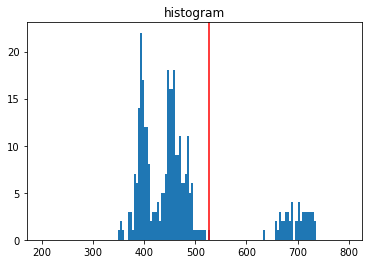

[1.]


In [137]:
t , h, e = plot_hist("waleed_14_7_1",0)
# print(t,e,h.size)
f = [ h[n] if e[n] < t else 0 for n in range(h.size)]
# print(f)

f =  100 *(f / np.sum(f))
# print(f)
# f = f[f != 0]
f = np.trim_zeros(f)
# print(f)
N = 59 - len(f)
f = np.pad(f, (0, N), 'constant')
# print(f)
data_list = np.array([f])
y_pred = clf.predict(data_list)
# y_pred[1600]
print(y_pred)

In [ ]:

vas_data_list , vas_target_list = pre_processing("vas")

print (vas_target_list.shape)
print (vas_data_list.shape)

print (type(vas_data_list[1]))
print ([vas_data_list[1].tolist()])

In [ ]:
# print (X_test[1600])
y_pred = clf.predict(np.array([vas_data_list[0].tolist()]))
# y_pred[1600]
print(y_pred)

In [ ]:
import numpy as np
import open3d as o3d
folder_indx = 0 
exp_name = "waleed_14_7_136"
folder = ["3D_Experements", "flat_Experements"]
dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")



#x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
my_sample_z =  np.array(dist)*np.sin(upper_angle)
my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

# print (type(my_sample_z.tolist()))

points = np.array([my_sample_x.tolist(), my_sample_y.tolist(), my_sample_z.tolist()])
print(points.shape)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:,:3])
# o3d.visualization.draw_geometries([pcd])
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))
# o3d.visualization.draw_geometries([bpa_mesh])
o3d.visualization.draw_geometries(bpa_mesh)
# dec_mesh = o3d.geometry.simplify_quadric_decimation(100000)
# dec_mesh.remove_degenerate_triangles()
# dec_mesh.remove_duplicated_triangles()
# dec_mesh.remove_duplicated_vertices()
# dec_mesh.remove_non_manifold_edges()

In [ ]:
import plotly.graph_objects as go
import numpy as np
  
# Data for three-dimensional scattered points
# z = 15 * np.random.random(100)
# x = np.sin(z) + 0.1 * np.random.randn(100)
# y = np.cos(z) + 0.1 * np.random.randn(100)
folder_indx = 0
exp_name = "ta7a_14_7_136"
folder = ["3D_Experements", "flat_Experements"]
dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")



#x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
my_sample_z =  np.array(dist)*np.sin(upper_angle)
my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
my_sample_z = my_sample_z[~np.isnan(my_sample_z)]
fig = go.Figure(data=[go.Mesh3d(x=my_sample_x, y=my_sample_y, z=my_sample_z, color='green',
                                opacity=0.80, alphahull=3)])
  
fig.show()